In [83]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [84]:
df_test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [85]:
df_test.shape

(8764, 8)

In [86]:
# Store target variable of training data in a safe place
adview_train = df_train.adview


In [87]:
adview_train

0        40
1         2
2         1
3         6
4         1
         ..
14994     2
14995     1
14996     4
14997     1
14998     1
Name: adview, Length: 14999, dtype: int64

In [88]:
# Concatenate training and test sets
data = pd.concat([df_train.drop(['adview'], axis=1), df_test])

In [89]:
data

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_18655,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [90]:
#Removing character "F" in data
df_train=df_train[df_train.views!='F']
df_train=df_train[df_train.likes!='F']
df_train=df_train[df_train.dislikes!='F']
df_train=df_train[df_train.comment!='F']
df_train


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [91]:
#Removing character "F" in data
df_test=df_test[df_test.views!='F']
df_test=df_test[df_test.likes!='F']
df_test=df_test[df_test.dislikes!='F']
df_test=df_test[df_test.comment!='F']
df_test


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [92]:
df_test.shape

(8549, 8)

In [93]:
#Assigning each category a number fo category features
category={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8}
df_test["category"]=df_test["category"].map(category)
df_test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,3
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,4
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,6
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,4


In [94]:
#Convert Values to integers for views,likes,comments,dislikes and adview
df_test["views"]=pd.to_numeric(df_test["views"])
df_test["comment"]=pd.to_numeric(df_test["comment"])
df_test["likes"]=pd.to_numeric(df_test["likes"])
df_test["dislikes"]=pd.to_numeric(df_test["dislikes"])


In [95]:
column_vid=df_test["vidid"]

In [96]:
#Encoing features like categoty,duration,vidid
from sklearn.preprocessing import LabelEncoder
df_test['duration']=LabelEncoder().fit_transform(df_test['duration'])
df_test['vidid']=LabelEncoder().fit_transform(df_test['vidid'])
df_test['published']=LabelEncoder().fit_transform(df_test['published'])

In [97]:
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [98]:
import datetime
import time

In [99]:
#cONVERT TIME IN SECONDS FOR DURATION
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
        if(h==''):
            h = '00'
        if(m == ''):
            m = '00'
        if(s==''):
            s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
df_test["duration"]=time1
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


(array([ 180.,  582.,  328.,    0., 4335.,  918.,    0.,  521., 1438.,
         247.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

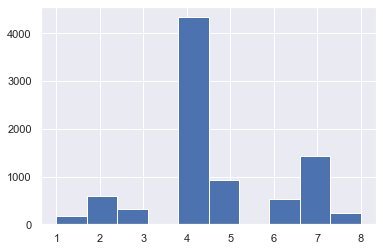

In [100]:
#Visulaization
#Individual plots
plt.hist(df_test["category"])

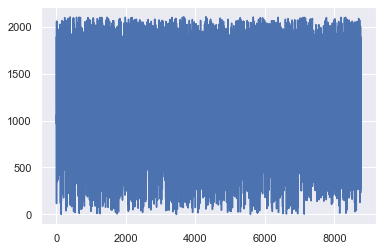

In [101]:
plt.plot(df_test['published'])
plt.show()

In [102]:
df_test.shape

(8549, 8)

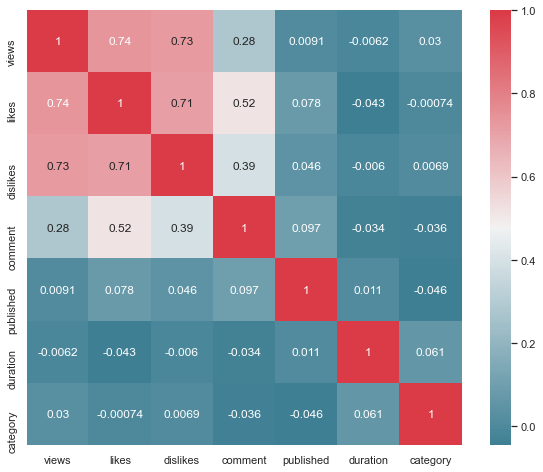

In [112]:
#Heatmap
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
corr=df_test.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True,ax=ax,annot=True)

plt.show()

In [104]:
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [105]:
df_test

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2
...,...,...,...,...,...,...,...,...
8759,5676,111205,471,14,101,231,194,3
8760,7863,1074457,1024,195,65,1800,8315,4
8761,3580,1891692,4606,1109,191,1823,434,6
8762,6882,714859,1639,151,382,1728,195,4


In [106]:
#Split data
Y_train = pd.DataFrame(data = df_test.iloc[:, 1].values, columns= ['target'])

df_test=df_test.drop(["vidid"],axis=1)
df_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [107]:
df_train = data.iloc[:891]
data_test = data.iloc[891:]

In [108]:
X = df_train.values
test = data_test.values
y = adview_train.values

In [81]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

ValueError: could not convert string to float: 'F'

In [111]:
pickle= pd.read_pickle("./decisiontree_youtubeadview.pkl")
pickle

UnpicklingError: invalid load key, '\x01'.